# Master run for code for GHA stability paper

All data should be regenerated at some point, after double-checking that the input data doesn't have missing timesteps...

In [1]:
import glob
from funcs_seasstats import wrapper_seasonal_stats
from funcs_process import (calculate_h,calculate_nearsurface,
                           calculate_resampled,calculate_uq,
                           calculate_hdiff,calculate_unstable,calculate_seasmeans,
                           subset_files)
from funcs_wrapper import (wrapper_figure3,wrapper_figure4,wrapper_figure5,wrapper_figure6,
                           wrapper_figure7,wrapper_figure8,wrapper_figure9,
                           wrapper_figure1011,wrapper_figure12,wrapper_figure13)
from funcs_support import (get_params,get_subset_params)
dir_list = get_params()
subset_params_all = get_subset_params()

In [2]:
## Reanalysis data products
mods_r = ['MERRA2']
#mods_r = ['MERRA2','JRA-55','ERA5']

## Rainfall data products
mods_p = ['CHIRPS']
#mods_p = ['CHIRPS','IMERG','GPCC']

## SST data products
mods_o = ['OISST']

In [3]:
file_params = {'overwrite':False}

## Data processing

### Calculate average rainy season stats

In [4]:
wrapper_seasonal_stats({'experiment_id':'historical','time':['1981-01-01','2022-12-31'],
                        'fn_suffix':'_HoA',
                        **subset_params_all['hoa']},
                       mod_subset = mods_p,
                        **file_params)

processing model CHIRPS!
processing average seasonal statistics
/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/pr_doyavg_CHIRPS_historical_seasstats_dunning_19810101-20221231_HoA.nc saved!
processing year-by-year seasonal statistics
starting year-by-year seasonal identification...


  0%|          | 0/41 [00:00<?, ?it/s]

/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/pr_ann_CHIRPS_historical_seasstats_dunning_19810101-20211231_HoA.nc saved!


In [5]:
import os; import xarray as xr
# The seasonal classification code struggles with two grid cells (out of ~ 2600) 
# in the study area (the long rains are erroneously classified as 6 months long); 
# values for them are taken from the mean of the two closest grid cells in the lat direction. 
fns = ['/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/pr_doyavg_CHIRPS_historical_seasstats_dunning_19810101-20221231_HoA.nc',
       '/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/pr_ann_CHIRPS_historical_seasstats_dunning_19810101-20211231_HoA.nc']
for fn in fns:
    stats = xr.open_dataset(fn)
    stats.loc[{'lon':36.125,'lat':5.375}] = stats.sel(lon=36.125,lat=[5.125,5.625]).mean('lat')
    stats.loc[{'lon':36.375,'lat':5.375}] = stats.sel(lon=36.375,lat=[5.125,5.625]).mean('lat')
    os.remove(fn)
    stats.to_netcdf(fn)
del stats

In [5]:
# Process larger area, with just annual stats, for seas_ratio for Figure 2
wrapper_seasonal_stats({'experiment_id':'historical','time':['1981-01-01','2022-12-31'],
                        'fn_suffix':'_GHA',
                        **subset_params_all['gha']},
                       proc_year = False,
                       mod_subset = mods_p,
                        **file_params)

processing model CHIRPS!
processing average seasonal statistics
/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/pr_doyavg_CHIRPS_historical_seasstats_dunning_19810101-20221231_GHA.nc saved!


### Save near-surface values

In [4]:
# Calculate near-surface humidity, temperature, circulation
for mod in mods_r: 
    calculate_nearsurface(var_list=['hus','ta','ua','va'],mod=mod,source_dir='raw',**file_params,
                          nan_search_subset = {})

/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/va-nsurf_day_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hus-nsurf_day_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ua-nsurf_day_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ta-nsurf_day_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ua-nsurf_day_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ta-nsurf_day_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hus-nsurf_day_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia

In [5]:
# Now, subset the original files with all pressure levels to to 
# just a subset to make them more managable for sharing
for mod in mods_r:
    subset_files(mod=mod,subset={'plev':slice(700,650)},
                 source_dir='raw',output_dir='full_files')

not all of plev found in ds dims (time, lat, lon), skipped.
original file moved to /dx01/kschwarz/project_data/gha_stability/climate_raw/MERRA2/full_files/va_day_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc
subset /dx01/kschwarz/project_data/gha_stability/climate_raw/MERRA2/va_day_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_raw/MERRA2/hus_day_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already subset, moved to full_files; skipped.
/dx01/kschwarz/project_data/gha_stability/climate_raw/MERRA2/ua_day_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already subset, moved to full_files; skipped.
original file moved to /dx01/kschwarz/project_data/gha_stability/climate_raw/MERRA2/full_files/ta_day_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc
subset /dx01/kschwarz/project_data/gha_stability/climate_raw/MERRA2/ta_day_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia

### Calculate $h$, $h^*$, $h_s-h^*$

In [6]:
for mod in mods_r:
    for varname_add,source_dir in zip(['','-nsurf'],['raw','proc']):
        # Calculate h = c_pT + L_vq + gz
        calculate_h(mod=mod,varname_add=varname_add,source_dir=source_dir,**file_params)

        # Calculate near-surface h
        #calculate_hs(mod=mod,varname_add=varname_add,source_dir=source_dir,**file_params)
        #calculate_nearsurface(var_list=['h'],mod=mod,source_dir='proc',**file_params)

    # Calculate hdiff = h_s-h^*
    calculate_hdiff(mod=mod,**file_params)


--------------------------
processing files of the form: "*HoA.nc"!
all files:
   /dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hsat_day_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc
   /dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/h_day_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc
   /dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/qsat_day_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc
already exist!

--------------------------
processing files of the form: "*eq-Atl.nc"!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hsat_day_MERRA2_historical_reanalysis_19800101-20211231_eq-Atl.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/h_day_MERRA2_historical_reanalysis_19800101-20211231_eq-Atl.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/qsat_day_MERRA2_historical_reanalysis_19800101-20211231_eq-Atl.nc saved!

--------------------------
processing files of th

### Calculate max daily $h_s-h^*$ from 3-hourly data

In [ ]:
# For Figure S6
#for mod in mods_r:
#    calculate_resampled(search_str = '*_HoA.nc')

### Calculate $unstable$
Boolean of when $h_s-h^*>0$ locally, to be used in seasonal average calculations.

In [6]:
for mod in mods_r:
    calculate_unstable(mod=mod,
                       var = 'hdiff',
                       search_str = '*HoA.nc',**file_params)

/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/unstable_day_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc saved!


### Calculate $\vec{u}q$

In [7]:
for mod in mods_r: 
    calculate_uq(mod=mod)


--------------------------
processing files of the form: "*HoA.nc" in directory raw with variables *!
all files:
   /dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/uq_day_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc
   /dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/vq_day_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc
already exist!

--------------------------
processing files of the form: "*eq-IO.nc" in directory raw with variables *!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/uq_day_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/vq_day_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!

--------------------------
processing files of the form: "*subtrop-AfrSAsia.nc" in directory raw with variables *!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/uq_day_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.n

### Calculate seasonal averages
Seasonal averages of: 

- $h_s-h^*$ and components, including fraction unstable
- $\vec{u}$, $\vec{u}q$

In [8]:
# Variables where we only need Horn of Africa averages and/or need both full means and anomaly means
for mod in mods_r: 
    for var in ['ta-nsurf','hus-nsurf','h-nsurf','hdiff','hsat','unstable']:
        # Calculate seasonal means 
        calculate_seasmeans(mod = mod,var=var,search_dir = 'proc',
                            suffixes = ['HoA.nc'],
                            **file_params)
        
        # Calculate seasonal means of anomalies vs. annual avg.  
        calculate_seasmeans(mod = mod,var=var,search_dir = 'proc',
                            anomaly='clim',
                            suffixes = ['HoA.nc'],
                            **file_params)

/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ta-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ta-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hus-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hus-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/h-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/h-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stabi

In [9]:
# Variables which are averaged over all geographic subsets 
# (and only anomalies are graphed)
for mod in mods_r:
    for var,source_dir in zip(['hdiff','hsat','h-nsurf','uq-nsurf','vq-nsurf','ua-nsurf','va-nsurf','ua','va'],
                              [*['proc']*7,*['raw']*2]):
        # Calculate seasonal means of anomalies vs. annual avg.  
        calculate_seasmeans(mod = mod,var=var,search_dir = source_dir,
                            anomaly='clim',
                            **file_params)

/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hdiff-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hdiff-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-Atl.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hdiff-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hdiff-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hsat-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hsat-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hsat-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/hsat-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-Atl.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/h-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/h-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/h-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-Atl.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/h-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/uq-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/uq-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/uq-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/vq-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/vq-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/vq-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ua-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ua-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ua-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/va-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/va-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/va-nsurf-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ua-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ua-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ua-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/va-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/va-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/va-anom_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!


In [11]:
# Circulation raw means 
for mod in mods_r:
    for var,source_dir in zip(['uq-nsurf','vq-nsurf','ua-nsurf','va-nsurf'],
                              [*['proc']*2,*['proc']*2]):
        # Calculate seasonal means of anomalies vs. annual avg.  
        calculate_seasmeans(mod = mod,var=var,search_dir = source_dir,
                            **file_params)

/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/uq-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/uq-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/uq-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/vq-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/vq-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/vq-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc already exists, skipped!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+
/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ua-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!
/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ua-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/ua-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/seasidxs_day_CHIRPS_historical_19810101-20211231_HoA.nc exists, loaded!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/va-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_eq-IO.nc saved!


/home/kschwarz/projects/gha_stability/code/funcs_process.py:1160: UserWarning: no geographic overlap between stats file and input `ds`; no `dunning_local` means will be calculated.
  warnings.warn('no geographic overlap between stats file '+


/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/va-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_subtrop-AfrSAsia.nc saved!
/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/va-nsurf_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!


In [13]:
# Seasonal average rainfall for rainfall products
for mod in mods_p:
    calculate_seasmeans(mod = mod,var='pr',search_dir = 'raw',
                        suffixes = ['GHA.nc'],suffix_out = 'HoA.nc',
                        subset_params_load = subset_params_all['hoa_slice'],
                                **file_params)

/dx01/kschwarz/project_data/gha_stability/climate_proc/CHIRPS/pr_seasavg_CHIRPS_historical_obs_19810101-20211231_HoA.nc already exists, skipped!


In [14]:
# Seasonal average rainfall for reanalysis
for mod in mods_r:
    calculate_seasmeans(mod = mod,var='pr',search_dir = 'raw',
                        suffixes = 'HoA.nc',
                    subset_params_load = subset_params_all['hoa_slice'],
                            **file_params)

/dx01/kschwarz/project_data/gha_stability/climate_proc/MERRA2/pr_seasavg_MERRA2_historical_reanalysis_19810101-20211231_HoA.nc already exists, skipped!


In [12]:
# Seasonal average SSTs
for mod in mods_o:
    calculate_seasmeans(mod = mod,var='tos',search_dir = 'raw',
                        calculate_local=False,
                            **file_params)

/dx01/kschwarz/project_data/gha_stability/climate_proc/OISST/tos_seasavg_OISST_historical_avhrr_19810901-20211231_NCIndOcean.nc saved!


## Figures

### Figure 1: GHA mean rainfall in a global / zonal context

In [ ]:
# See `plot_figure1.py`

### Figure 2: GHA study area

In [ ]:
# See `plot_figure2.py`

### Figure 3 and S1-S2: Boxplots and Histograms

calculating or loading seasonal booleans...
plotting...
/home/kschwarz/projects/gha_stability/figures/figure3.pdf saved!
/home/kschwarz/projects/gha_stability/figures/figure3.png saved!


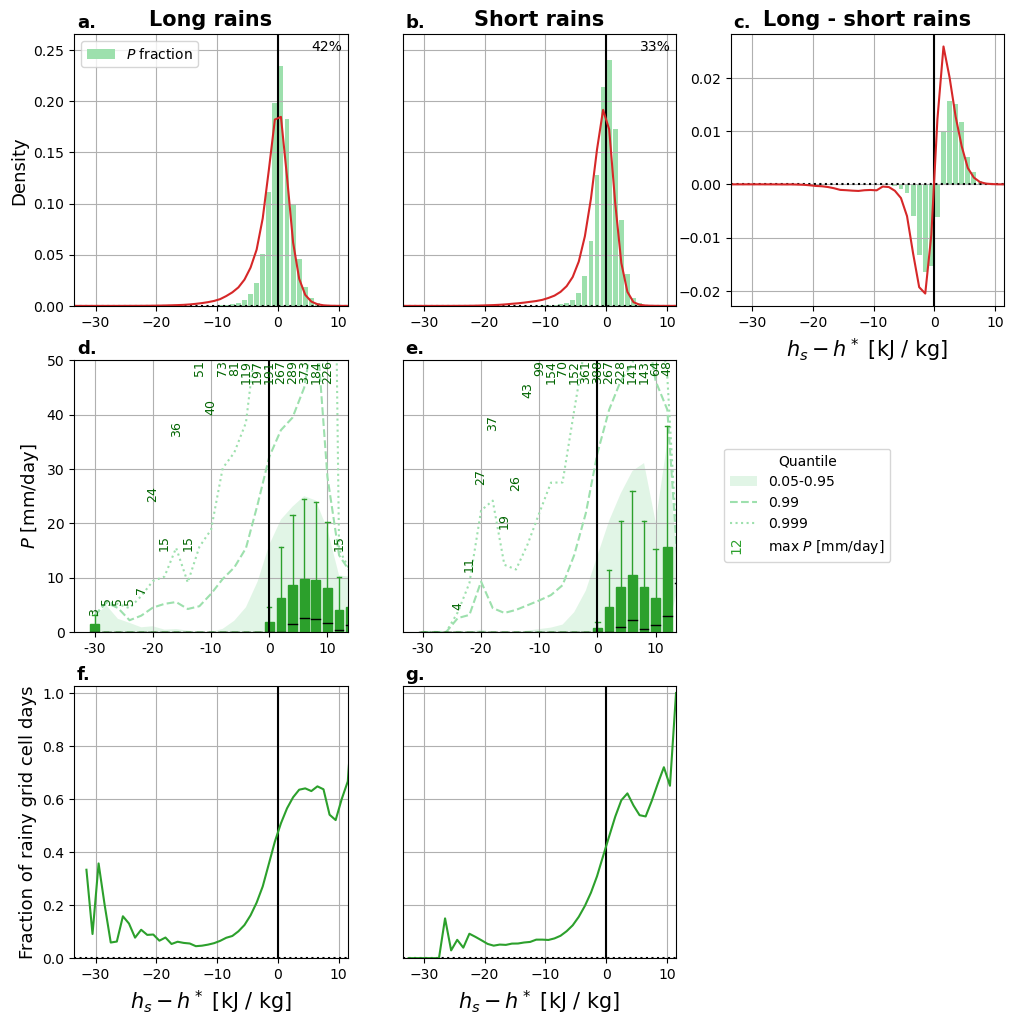

In [16]:
wrapper_figure3(save_fig=True,subset_params = subset_params_all['hoa_slice'],
                output_fn=dir_list['figs']+'figure3')

#### Alternate versions

calculating or loading seasonal booleans...
plotting...
/home/kschwarz/projects/gha_stability/figures/figure_s5.pdf saved!
/home/kschwarz/projects/gha_stability/figures/figure_s5.png saved!


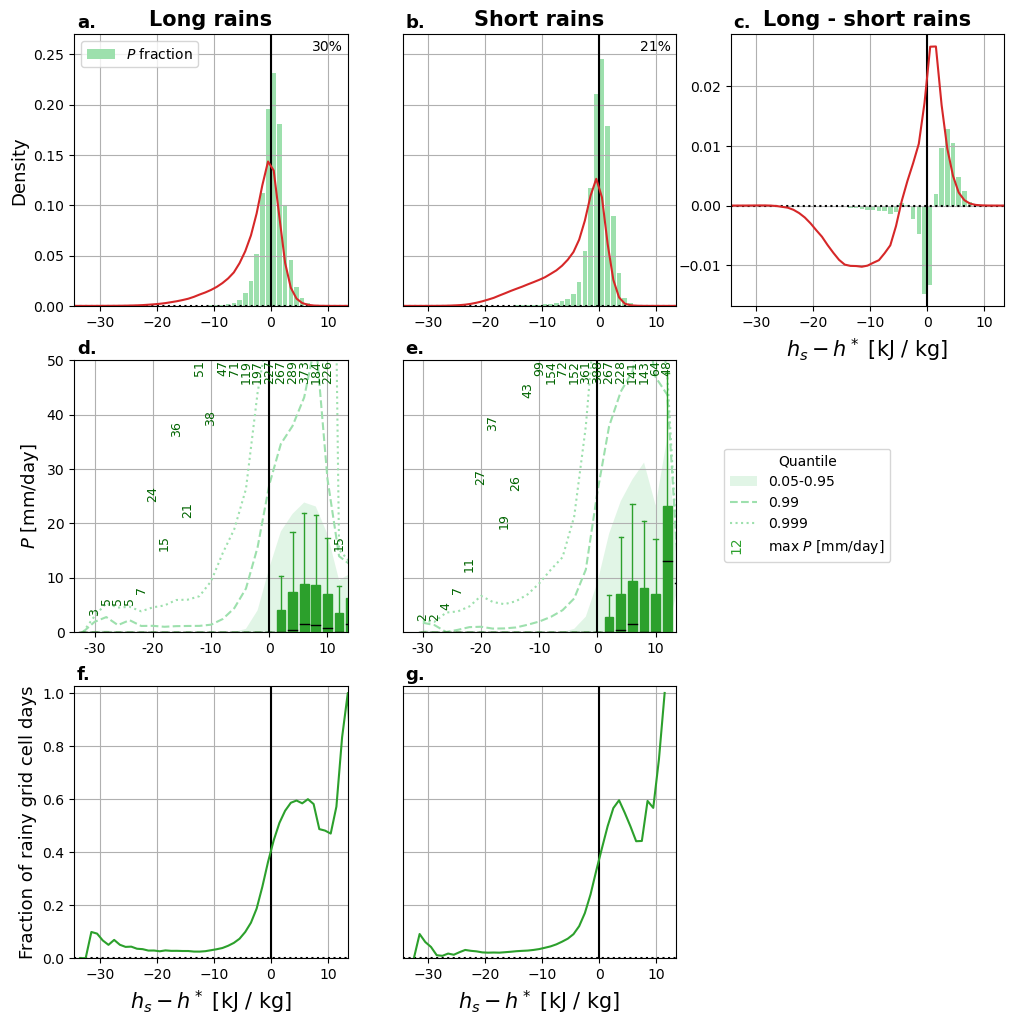

In [17]:
wrapper_figure3(kind='month',save_fig=True,output_fn=dir_list['figs']+'figure_s5')

calculating or loading seasonal booleans...
/dx01/kschwarz/aux_data/seasidxs_day_CHIRPS_historical_19800101-20221231_HoA.nc exists, loaded!
plotting...
../figures/figure_s5.pdf saved!
../figures/figure_s5.png saved!


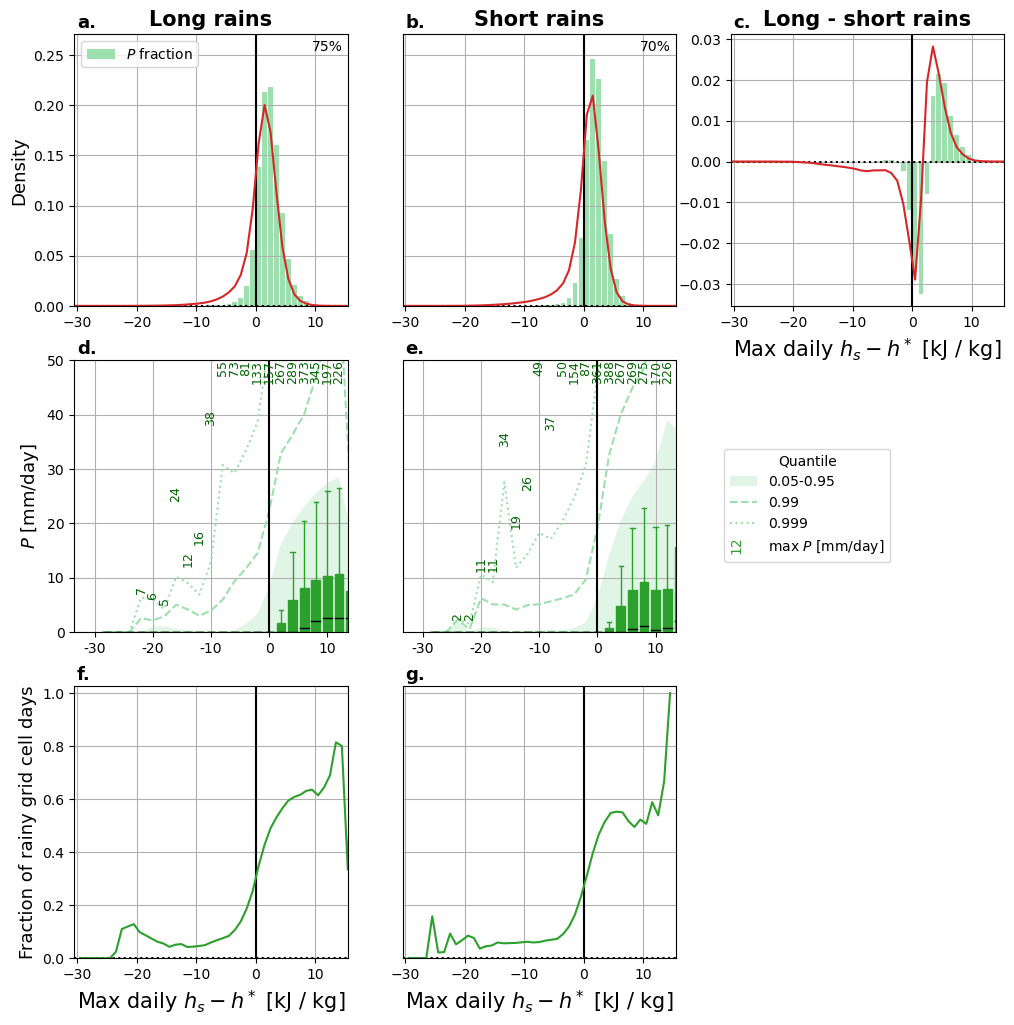

In [6]:
wrapper_figure3(var='hdiffmax',save_fig=True,output_fn=dir_list['figs']+'figure_s6')

### Figure 4: Seasonal cycle of % of grid cells unstable

/home/kschwarz/projects/gha_stability/figures/figure4.pdf saved!
/home/kschwarz/projects/gha_stability/figures/figure4.png saved!


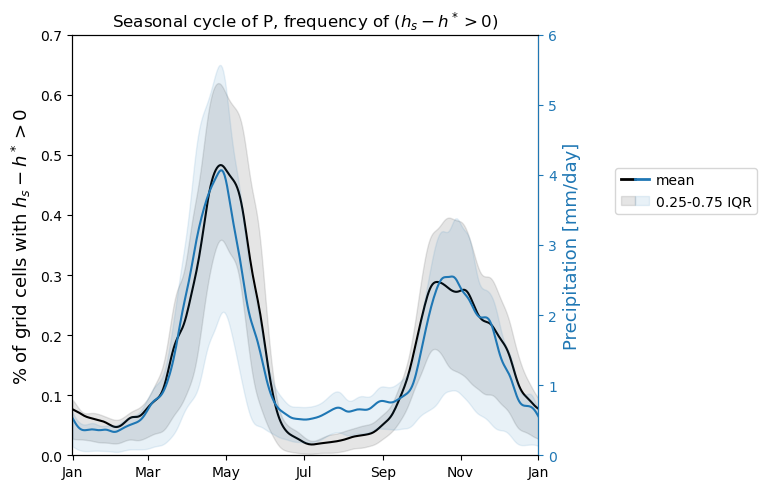

In [8]:
wrapper_figure4(mod_h='MERRA2',save_fig=True,output_fn=dir_list['figs']+'figure4',
                subset_params = subset_params_all['hoa_slice'])

#### Alternate versions

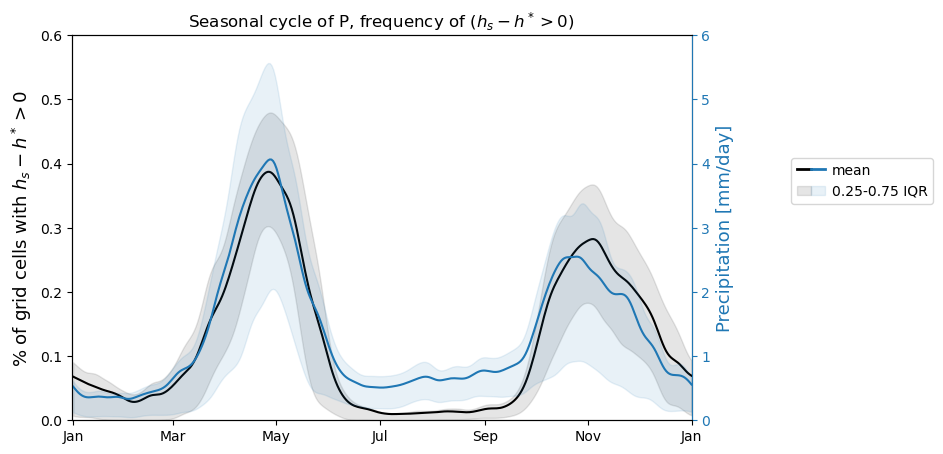

In [20]:
wrapper_figure4(mod_h='MERRA2',save_fig=False,plev=700,
                ylims = [[0,0.6],[0,6]])

In [ ]:
#wrapper_figure4(mod_h='ERA5',plev=650,ylims = [[0,0.7],[0,6]])

### Figure 5: Seasonal cycle of $h_s-h^*$, $P$, and $h_s-h^*$ component anomalies

/home/kschwarz/projects/gha_stability/figures/figure5.pdf saved!
/home/kschwarz/projects/gha_stability/figures/figure5.png saved!


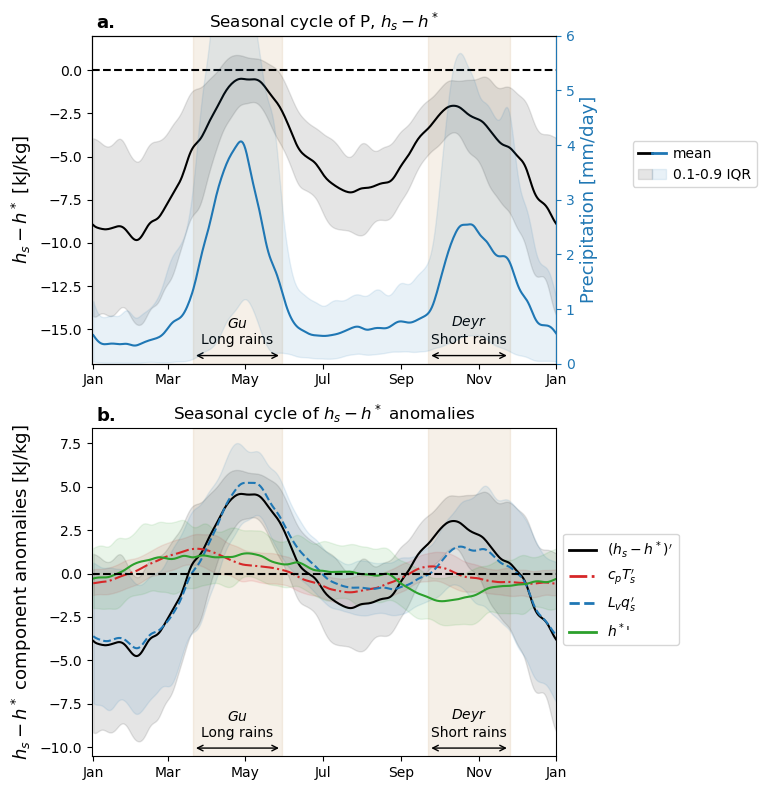

In [21]:
wrapper_figure5(mod_h = 'MERRA2',save_fig=True,output_fn=dir_list['figs']+'figure5')

#### Alternate versions

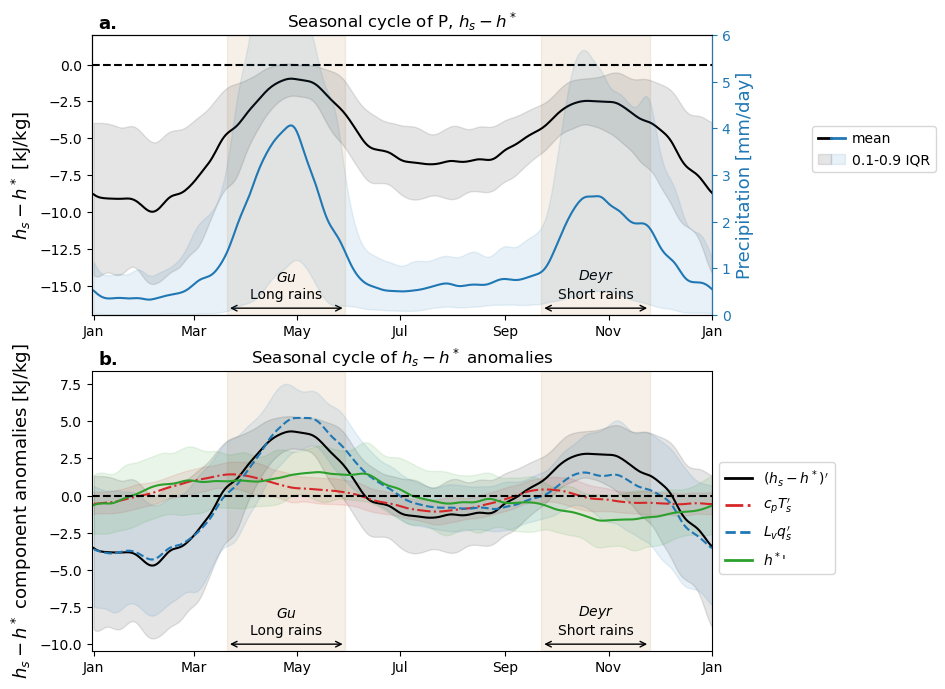

In [22]:
wrapper_figure5(mod_h = 'MERRA2',save_fig=False,
                plev=700)

In [ ]:
#wrapper_figure5(mod_h = 'JRA-55')

In [ ]:
#wrapper_figure5(mod_h = 'ERA5')

### Figure 6: $P$ vs. $h_s-h^*$

/home/kschwarz/projects/gha_stability/figures/figure6.pdf saved!
/home/kschwarz/projects/gha_stability/figures/figure6.png saved!


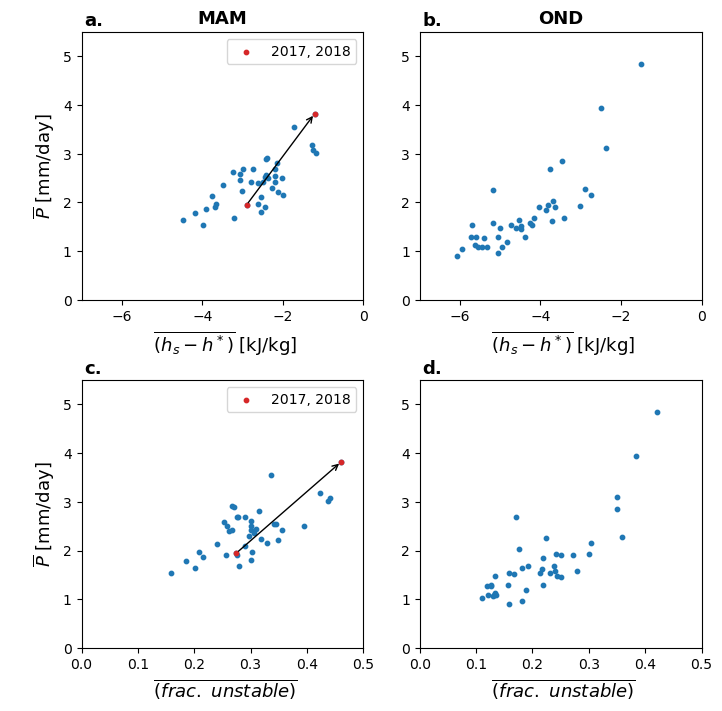

In [4]:
wrapper_figure6(save_fig=True,subset_params = subset_params_all['hoa_slice'],
                output_fn=dir_list['figs']+'figure6')

#### Alternate versions

In [ ]:
#wrapper_figure6(mod_a = 'ERA5',subset_params = subset_params_all['hoa_slice'])

In [ ]:
#wrapper_figure6(mod_a = 'JRA-55',subset_params = subset_params_all['hoa_slice'])

### Figure 7: Temperature and radiation climatologies

/home/kschwarz/projects/gha_stability/figures/figure7.pdf saved!
/home/kschwarz/projects/gha_stability/figures/figure7.png saved!


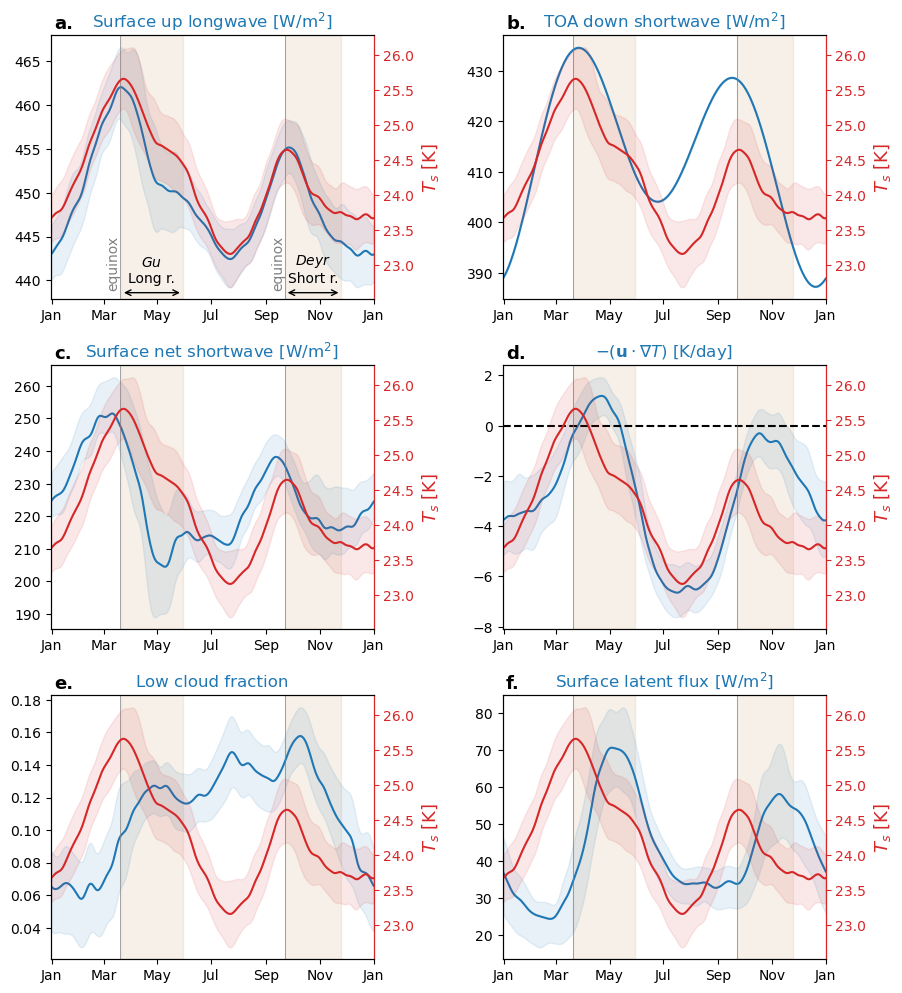

In [4]:
wrapper_figure7(save_fig=True,output_fn=dir_list['figs']+'figure7')

### Figure 8: Interannual variability in $h_s-h^*$ components

/home/kschwarz/projects/gha_stability/figures/figure8.pdf saved!
/home/kschwarz/projects/gha_stability/figures/figure8.png saved!


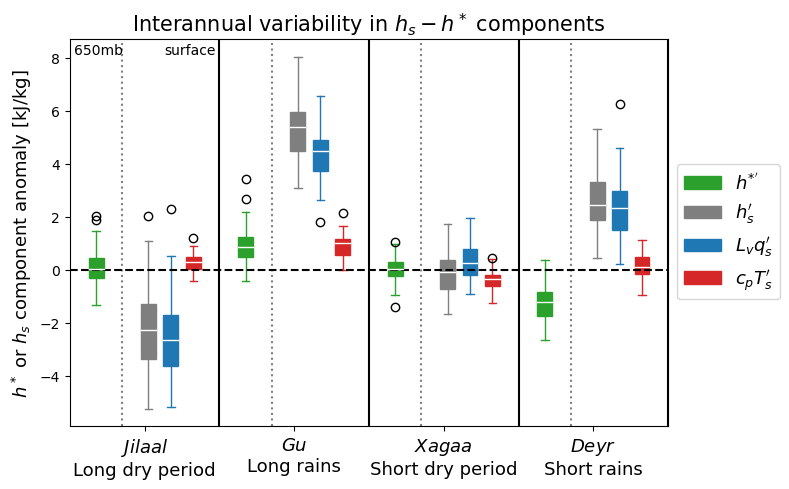

In [5]:
wrapper_figure8(mod='MERRA2',save_fig=True,output_fn=dir_list['figs']+'figure8')

#### Alternate versions

In [5]:
#wrapper_figure6(mod='JRA-55')

In [6]:
#wrapper_figure6(mod='ERA5')

In [7]:
#wrapper_figure6(mod='MERRA2',mean_kind='dunning')

### Figure 9: $\vec{u}$ and $\vec{u}q_s$

/home/kschwarz/projects/gha_stability/figures/figure9.pdf saved!
/home/kschwarz/projects/gha_stability/figures/figure9.png saved!


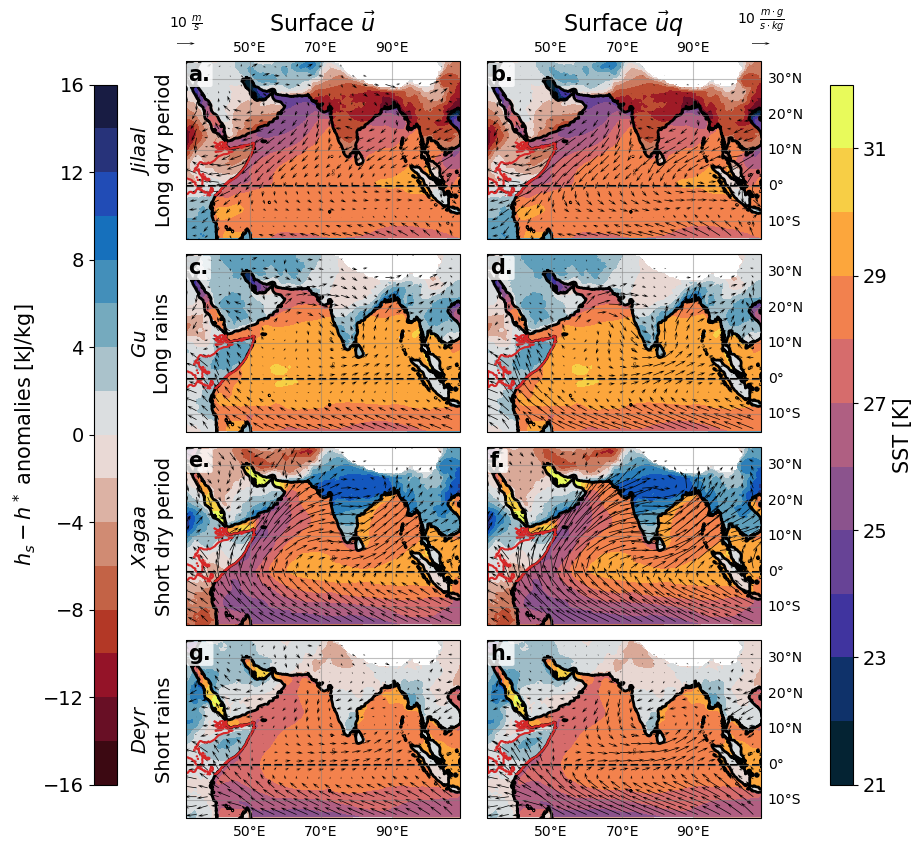

In [4]:
wrapper_figure9(save_fig=True,output_fn=dir_list['figs']+'figure9')

### Figures 10 - 11: $h_s$ and $h^*$ anomaly maps

../figures/figure8.pdf saved!
../figures/figure8.png saved!


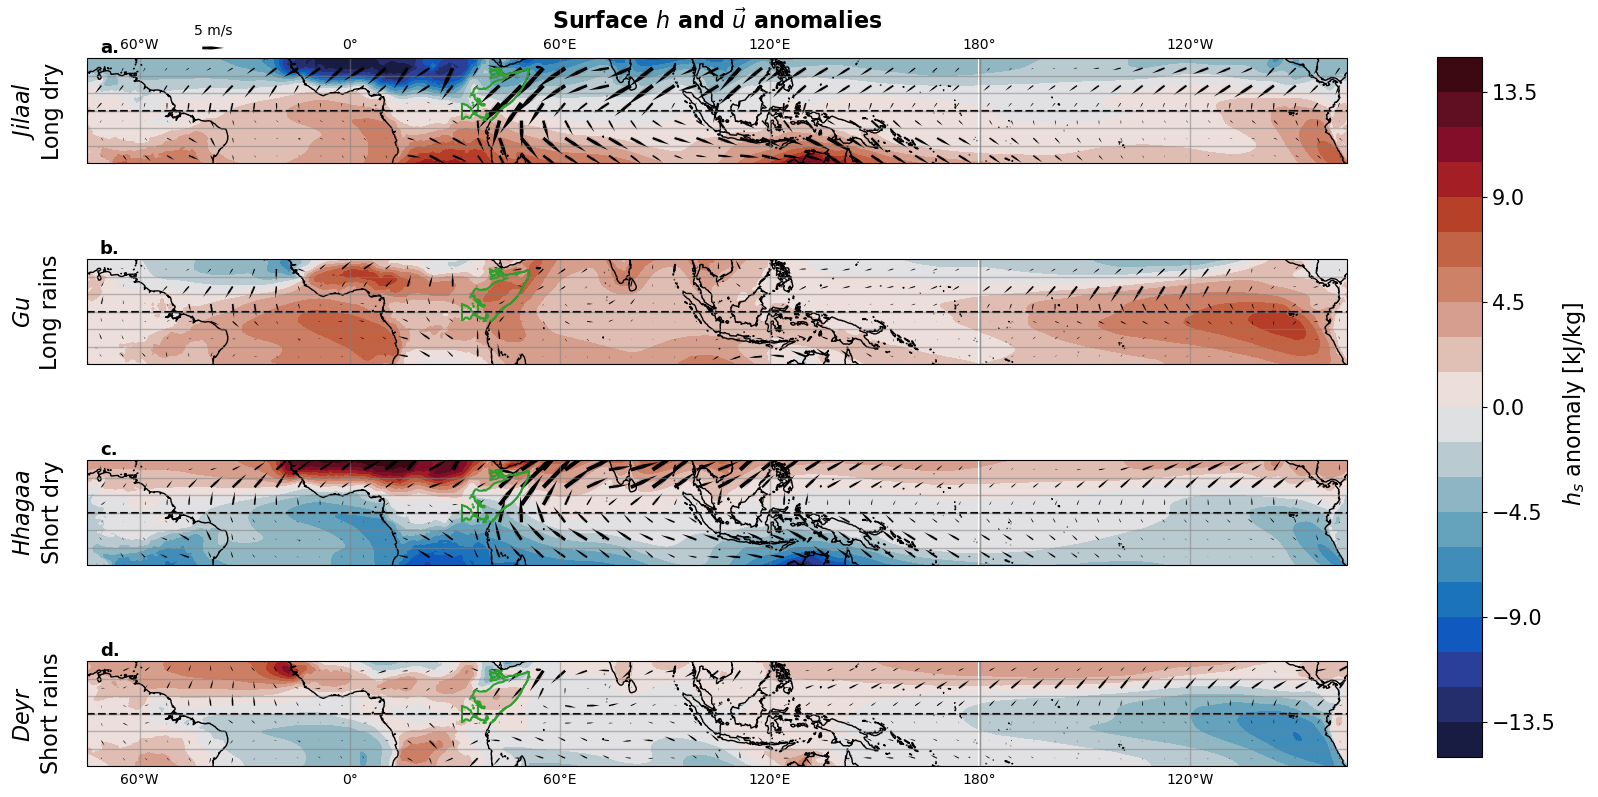

In [4]:
wrapper_figure1011(var='h-nsurf',
                 save_fig=True,output_fn=dir_list['figs']+'figure10')

../figures/figure9.pdf saved!
../figures/figure9.png saved!


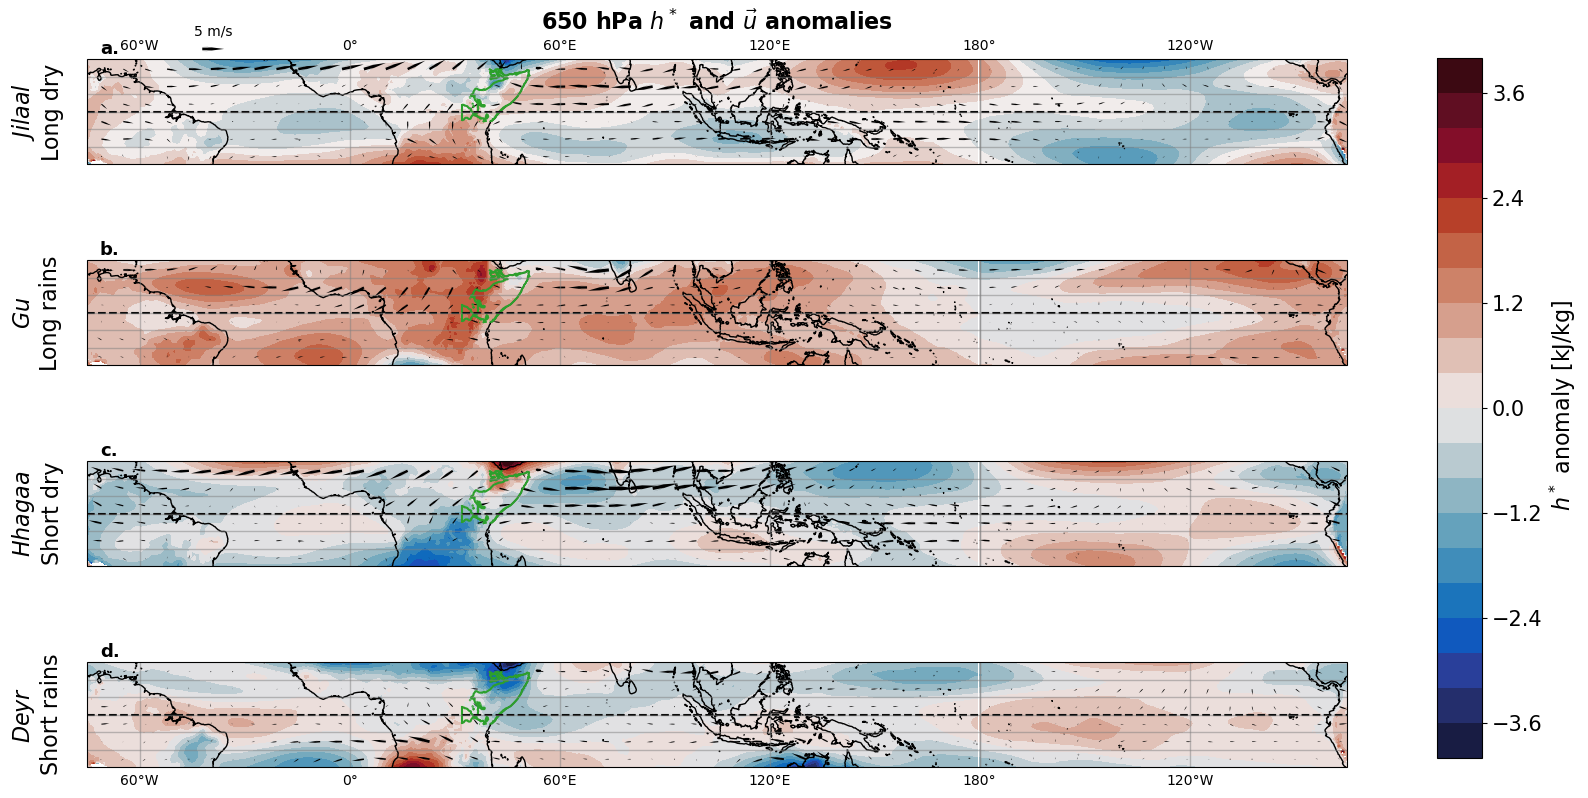

In [5]:
wrapper_figure1011(var='hsat',
                 save_fig=True,output_fn=dir_list['figs']+'figure11')

### Figure 12: interannual differences in $P$ vs. $h_s-h^*$

/home/kschwarz/projects/gha_stability/figures/figure12.pdf saved!
/home/kschwarz/projects/gha_stability/figures/figure12.png saved!


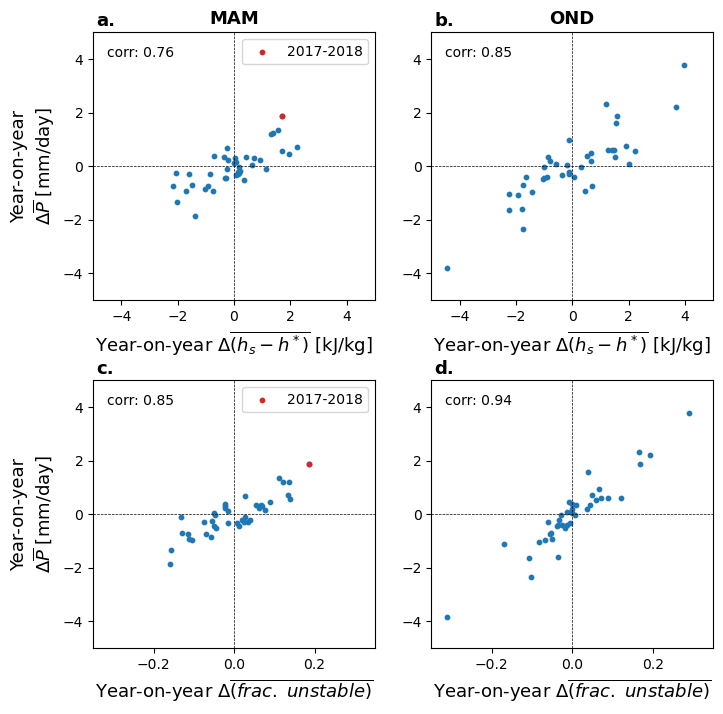

In [4]:
wrapper_figure12(save_fig=True,output_fn=dir_list['figs']+'figure12')

### Figure 13: map differences in $P$, $h_s-h^*$

/home/kschwarz/projects/gha_stability/figures/figure13.pdf saved!
/home/kschwarz/projects/gha_stability/figures/figure13.png saved!


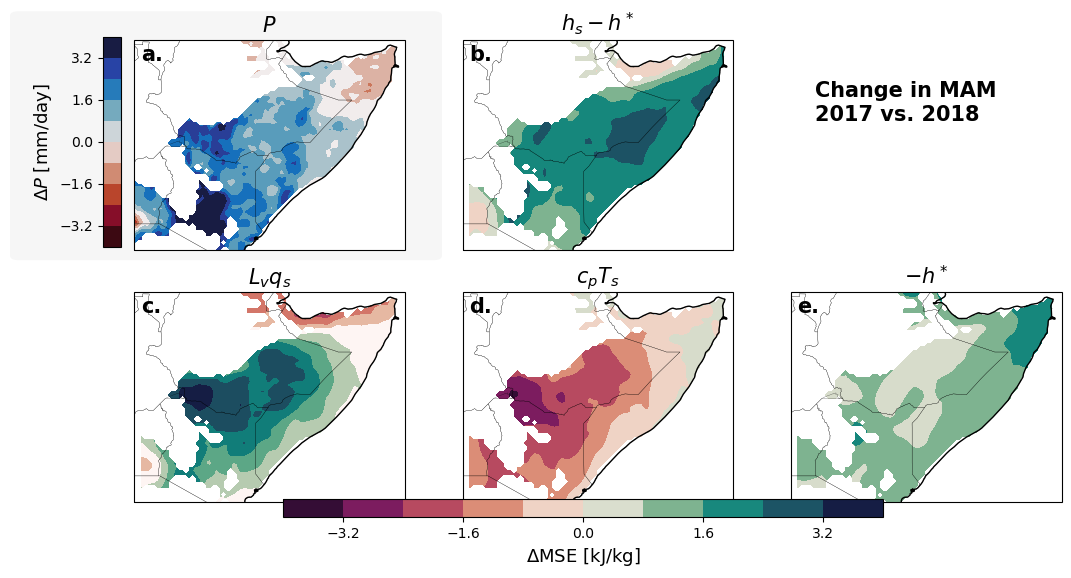

In [11]:
wrapper_figure13(mod_a='MERRA2',yrs=[[2017],[2018]],
                 save_fig=True,output_fn=dir_list['figs']+'figure13')

### Figure S1: vertical structure of $h_s-h^*$

### Figure S3-4: comparison between reanalyses

### Figure S6: Spatial correlations of daily $h_s-h^*$ 

### Figure S7: Spatial correlations of seasonal $h_s-h^*$